<a href="https://colab.research.google.com/github/SatyaPraveenKumarreddyYalla/EDA_Analysis/blob/main/Titanic_EDA_ANalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#liberies and modules

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings as wr
wr.filterwarnings('ignore')
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn import discriminant_analysis as DCA
from sklearn import preprocessing
from sklearn import decomposition as PCA
from sklearn import metrics
from sklearn import ensemble
from sklearn import cluster
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error # Import mean_absolute_error
from sklearn.model_selection import cross_val_score

#Load-Dataset

In [13]:
df = pd.read_csv("/content/sample_data/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [7]:
df.info()
df.shape
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [10]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


#Demo analysis

In [14]:
#1. Create histograms and boxplots for numeric features using Plotly Express
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    # Histogram
    fig_hist = px.histogram(df, x=col, title=f'Histogram of {col}')
    fig_hist.show()

    # Boxplot
    fig_box = px.box(df, y=col, title=f'Boxplot of {col}')
    fig_box.show()

# 2. Use pairplot/correlation matrix for feature relationships using Plotly Express
# Pairplot (can be computationally intensive for many features)
fig_pair = px.scatter_matrix(df[numeric_cols], title='Pairwise Scatter Plot of Numeric Features')
fig_pair.show()

# Correlation matrix
correlation_matrix = df[numeric_cols].corr()
fig_corr = px.imshow(correlation_matrix,
                    text_auto=True,
                    title='Correlation Matrix of Numeric Features')
fig_corr.show()



#Univariate Analysis

In [16]:
x = df["Ticket"].value_counts()
fig = go.Figure()
fig.add_trace(go.Box(y=x, name='Ticket Value Counts'))
fig.update_layout(width=1000, height=1000, title='Boxplot of Ticket Value Counts')
fig.show()

#Linear model

In [17]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
# Correct the typo in 'cloumns_to_encode' to 'columns_to_encode'
columns_to_encode = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,2,108,1,28,1,0,523,18,147,2
1,1,1,0,190,0,51,1,0,596,207,81,0
2,2,1,2,353,0,34,0,0,669,41,147,2
3,3,1,0,272,0,47,1,0,49,189,55,2
4,4,0,2,15,1,47,0,0,472,43,147,2


In [22]:
def coeff(x,y):
  mean_x,mean_y = np.mean(x),np.mean(y)
  n = np.mean(x)
  b0 = (n*np.sum(y*x)-np.sum(x)*np.sum(y))/(n*np.sum(x*x)-np.sum(x)*np.sum(x))
  b1 = mean_y -(b0*mean_x)
  return b0,b1

def LinearRegression(x, y, b):
    x_values = x.iloc[:, 0]
    y_pred = b[0] + b[1] * x_values
    fig = go.Figure()
    fig.add_trace(go.Box(y=np.abs(y_pred), name='Prediction of class'))
    fig.update_layout(width=800,height=600, title='Prediction of class')

    fig.show()
    return y_pred

x = df[["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]]
y = df["Ticket"]
b = coeff(x.iloc[:, 0], y)
print("Slope: ",b[0])
print("Intercept: ",b[1])
y_pred = LinearRegression(x,y,b)

y_pred = []
for i in range(len(x)):
  y_pred.append(b[0] + b[1]*x.iloc[i, 0])
d = 0
for i in range(0,len(y)):
  d = d+(y[i]-y_pred[i])**2
print("MEAN_Square_Error : ",d/len(y))
print("R2_Score : ",r2_score(y,y_pred))
print("Mean_Absolute_Error: ",mean_absolute_error(y,y_pred))

ssr,sst=0,0
y_mean=np.mean(y)
for i in range(0,len(y)):
  ssr=ssr+(y_pred[i]-y_mean)**2
  sst = sst+(y[i]-y_mean)**2
print("R2_Score : ",1-(ssr/sst))

Slope:  1.1631762274327901
Intercept:  -179.0848016789721


MEAN_Square_Error :  8525546394.288021
R2_Score :  -211573.53974337515
Mean_Absolute_Error:  80030.10219044377
R2_Score :  -211598.4938898179


#kdeplot analysis

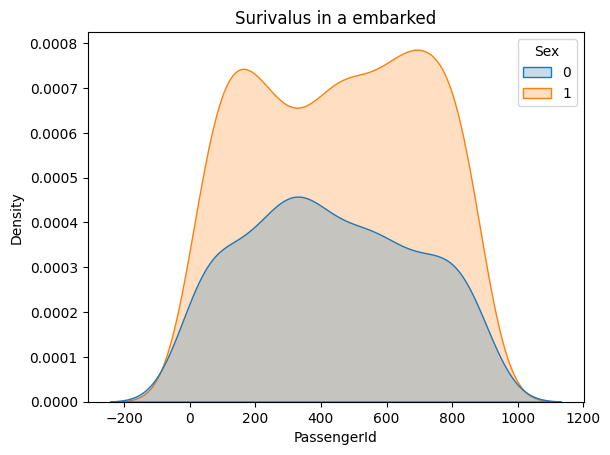

In [33]:
y = df["Sex"]
x= df[["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]]
fig = sns.kdeplot(data=df, x='PassengerId', hue='Sex', fill=True)
fig.set_title('Surivalus in a embarked')
plt.show()

#BARPLOT

In [29]:
fig = px.bar(
    df,
    x='Embarked',
    y='Survived',
    title='Surivalus in a embarked',
    color_discrete_sequence=px.colors.sequential.Plasma,
    template='plotly_white',
    hover_data=['Name']
)
fig.update_layout(width=1000, height=1000)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_traces(
    textposition='inside'
)
fig.show()

#SWARM plot

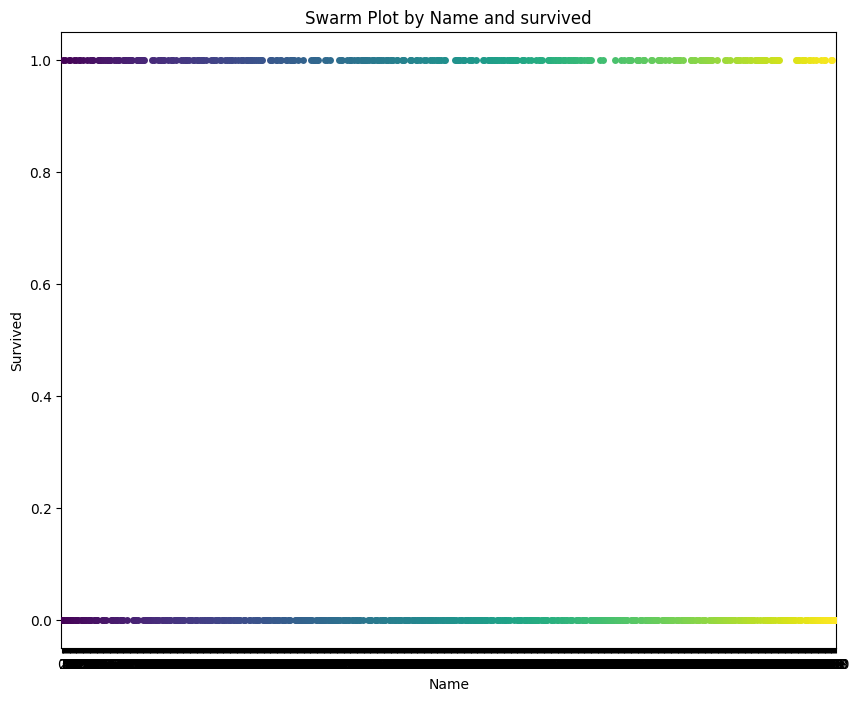

In [35]:
plt.figure(figsize=(10, 8))

sns.swarmplot(x="Name", y="Survived", data=df, palette='viridis')

plt.title('Swarm Plot by Name and survived')
plt.xlabel('Name')
plt.ylabel('Survived')
plt.show()

#Bivariate Analysis

<Figure size 1000x600 with 0 Axes>

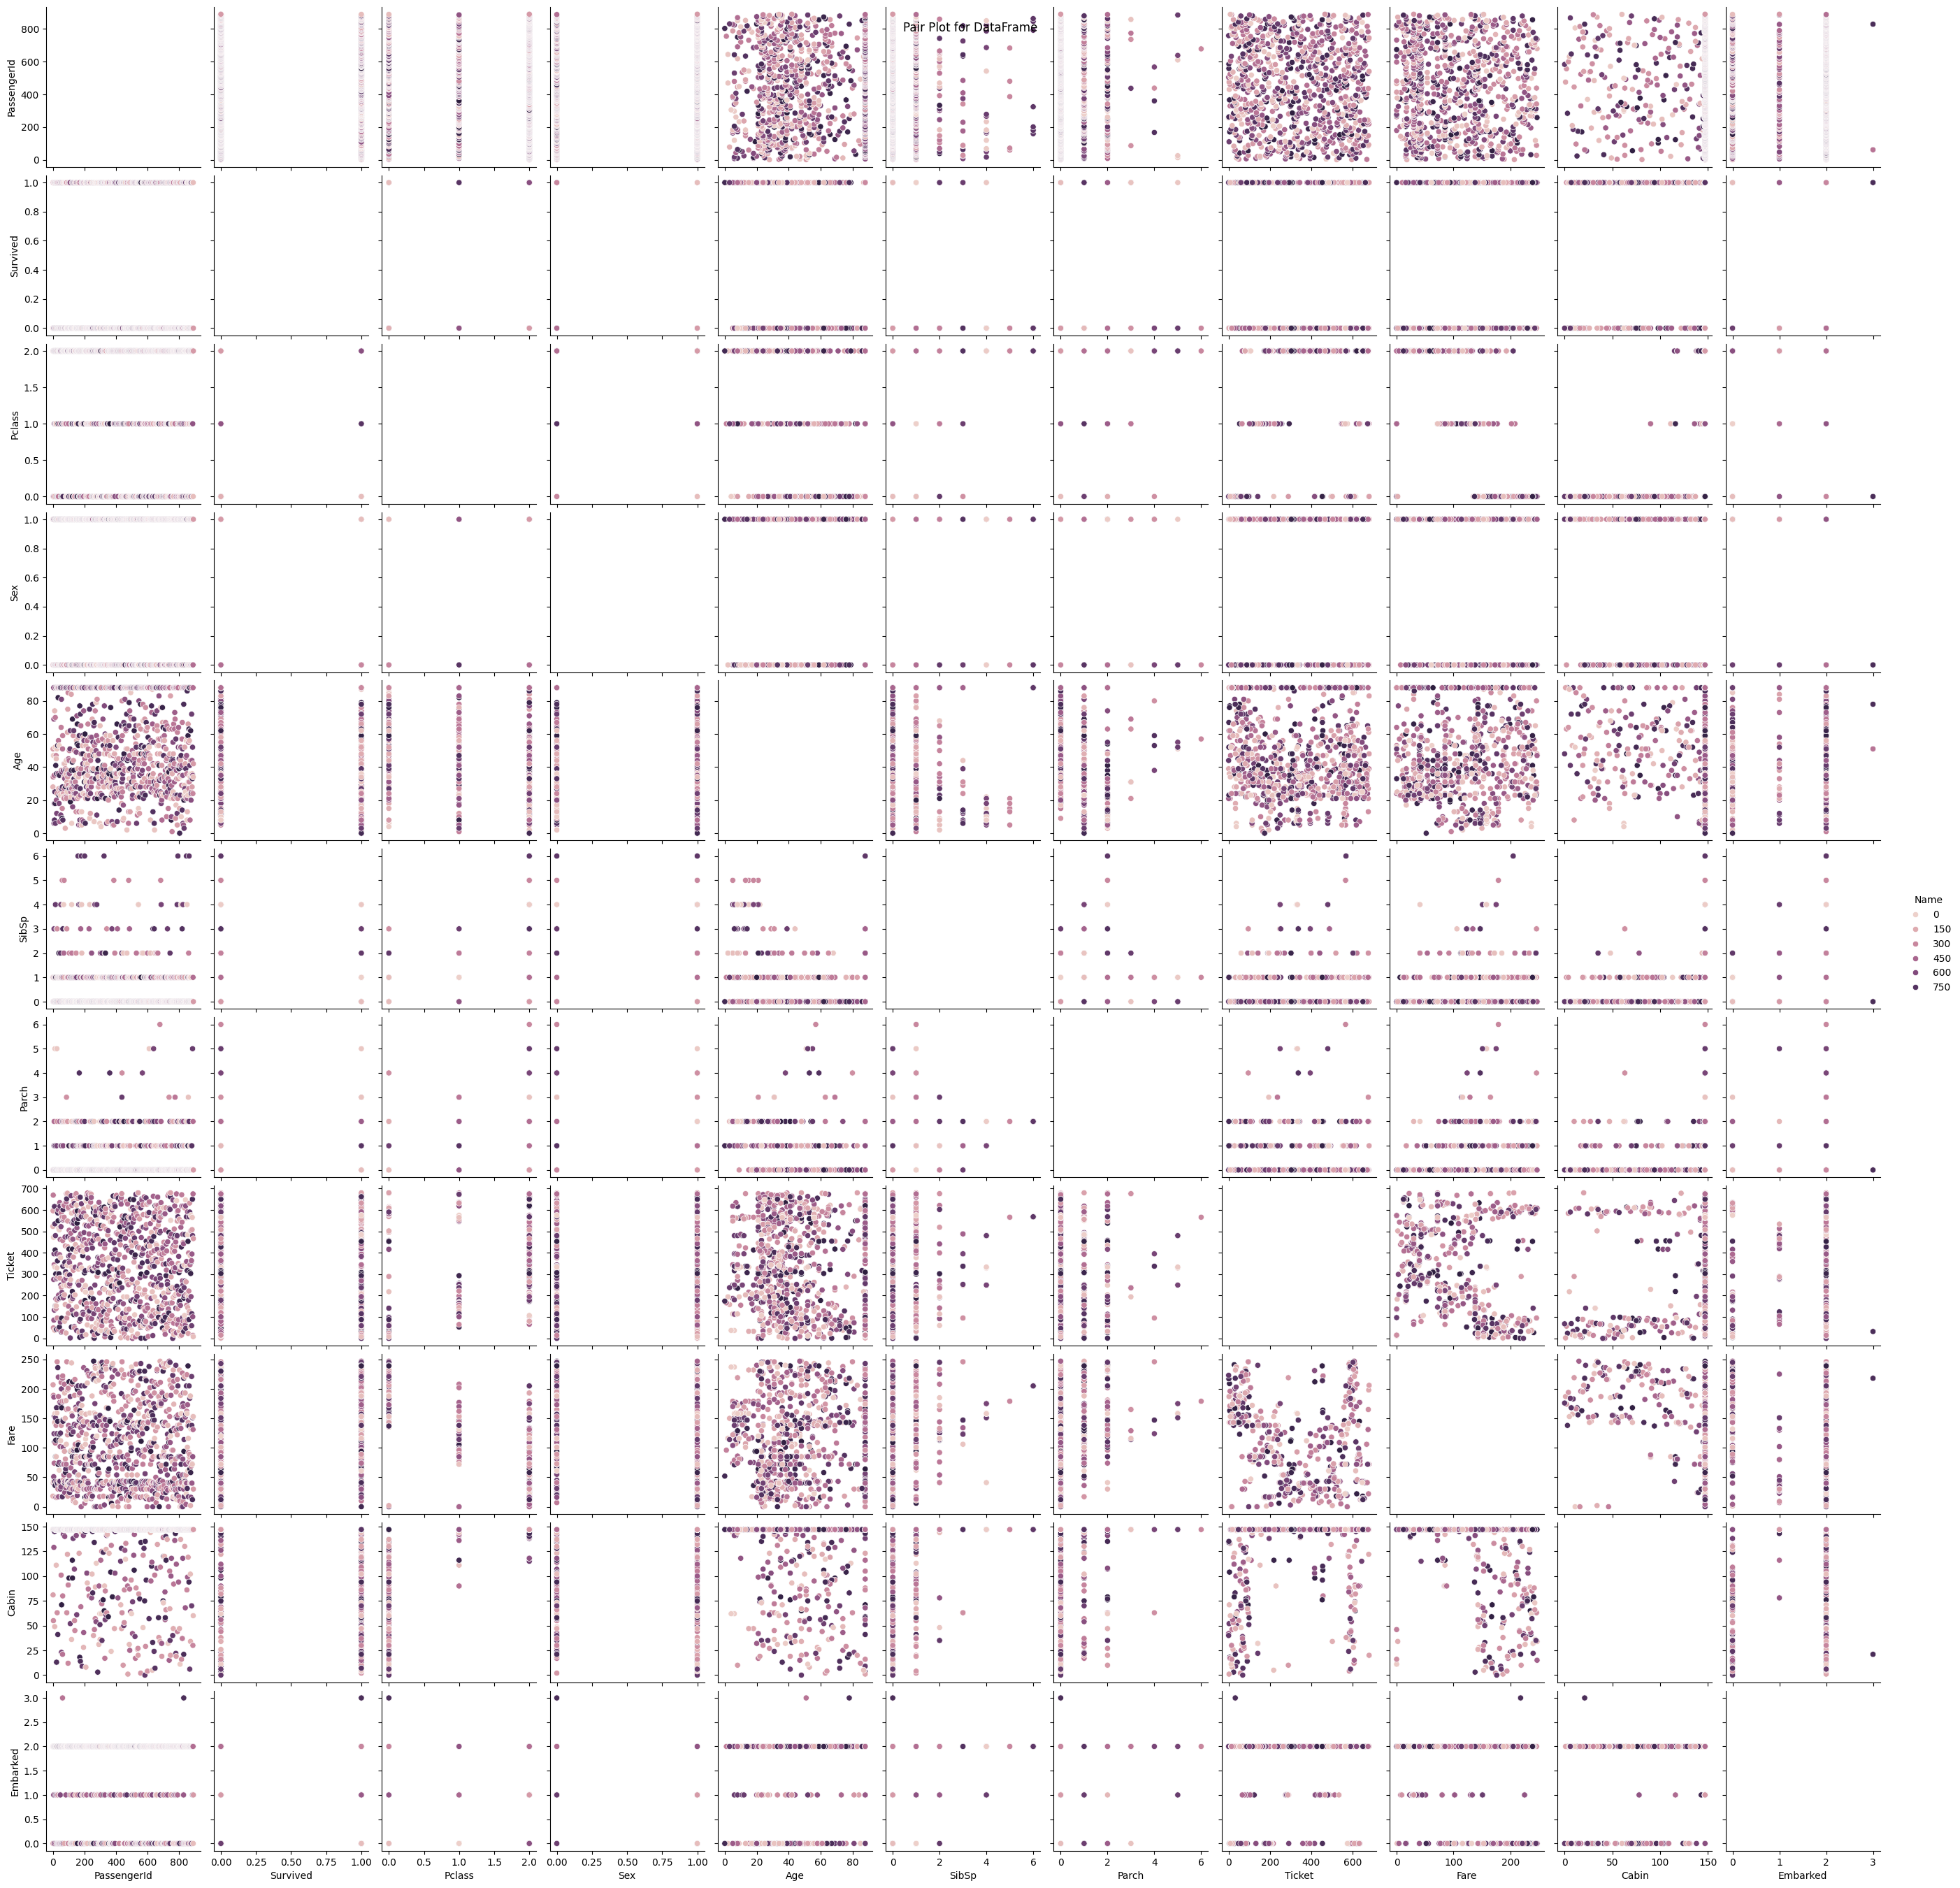

In [36]:
sns.set_palette("Pastel1")

plt.figure(figsize=(10, 6))

sns.pairplot(df,hue="Name")

plt.suptitle('Pair Plot for DataFrame')
plt.show()

#Violin Plot for examining the relationship

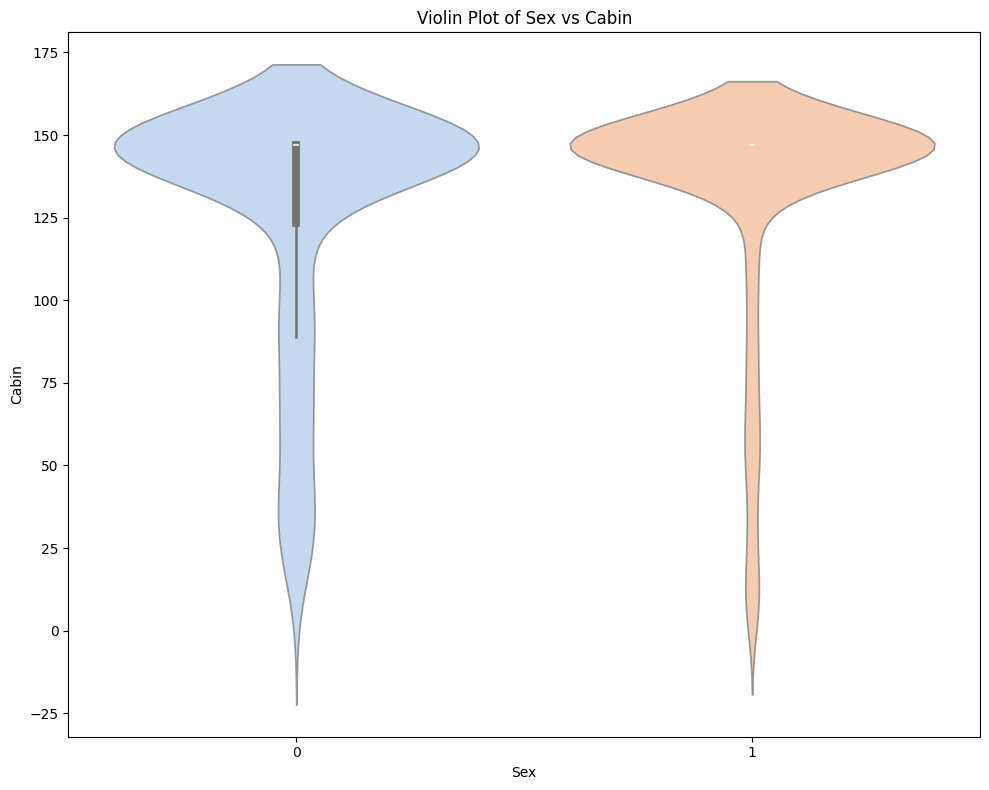

In [42]:
# Ensure 'Name' column is of string type
df['Name'] = df['Name'].astype(str)

# Create the violin plot
plt.figure(figsize=(10, 8))

# Using appropriate categorical mapping if 'Sex' and 'Cabin' are categorical
sns.violinplot(
    x='Sex',
    y='Cabin',
    data=df,
    palette='pastel',  # You can customize this or use a dictionary if 'Sex' is 0/1
    alpha=0.7
)

# Set plot title and axis labels
plt.title('Violin Plot of Sex vs Cabin')
plt.xlabel('Sex')
plt.ylabel('Cabin')
plt.tight_layout()
plt.show()


<Axes: xlabel='Name', ylabel='SibSp'>

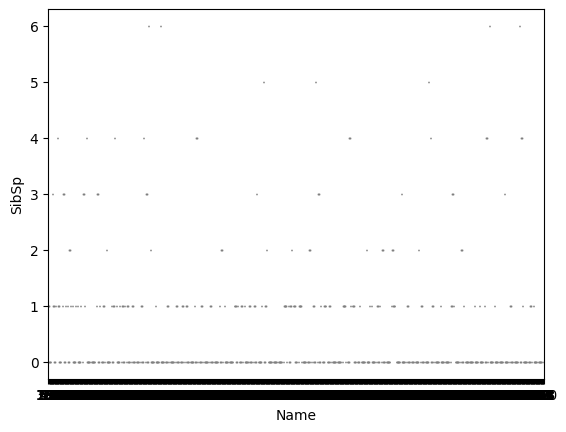

In [43]:
sns.boxplot(x='Name', y='SibSp', data=df)

#Scatter Analysis

In [44]:
fig = px.scatter_matrix(
    df,
    dimensions=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
    color='Survived',
    title='Scatter Matrix Plot of DataFrame',
    height=1000,
    width=1000,
    color_continuous_scale=px.colors.sequential.Plasma,
)
fig.show()

#PCA

In [51]:
from sklearn.decomposition import PCA
import plotly.express as px
features = df.drop('Survived', axis=1)
target = df['Survived']

# Perform PCA
pca = PCA(n_components=2) # Reduce to 2 components for visualization
components = pca.fit_transform(features)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data = components, columns = ['principal_component_1', 'principal_component_2'])
pca_df['Survived'] = target

# Visualize PCA results using Plotly Express
fig = px.scatter(pca_df,
                 x='principal_component_1',
                 y='principal_component_2',
                 color='Survived',
                 title='PCA of Titanic Dataset',
                 height=600,
                 width=800)
fig.show()